# ML using only watch data only

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [54]:
xtrain = pd.read_csv("Clean_Data//clean_train_watch.csv")
xtest = pd.read_csv("Clean_Data//clean_test_watch.csv")

In [55]:
xtrain.drop(["ID"],axis = 1, inplace = True)
xtest.drop(["ID"],axis = 1, inplace = True)

In [56]:
ytrain = xtrain["output"]
xtrain.drop(["output"],axis = 1, inplace = True)

In [57]:
ytest = xtest["output"]
xtest.drop(["output"],axis = 1, inplace = True)

In [58]:
le = LabelEncoder()
y_train = le.fit_transform(ytrain)
y_test = le.fit_transform(ytest)

In [59]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# xtrain = mm.fit_transform(xtrain)
# xtest = mm.fit_transform(xtest)

## K fold function

In [60]:
def kfold(classifier,cv):
    score=cross_val_score(classifier,xtrain,ytrain,cv=cv)
    print("Individual Score:",score)
    print("Mean Score:",score.mean()*100,"%")
  # plot
    plt.plot(np.arange(cv), score, 'o-', linewidth=1)
    plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
    plt.xlabel('number of Folds')
    plt.ylabel('Accuracy score')
    plt.show()

## randomforest with no hyperparamter tunning

In [61]:
rfc = RandomForestClassifier(n_estimators=200)

Testing Accuracy only watch:65.07936507936508%
Individual Score: [0.72222222 0.58333333 0.65277778 0.625      0.71428571]
Mean Score: 65.95238095238096 %


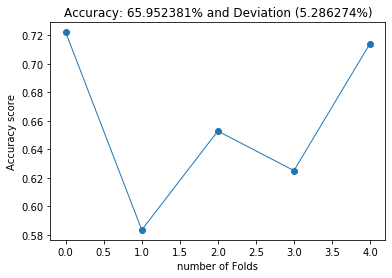

In [62]:
rfc.fit(xtrain,y_train)
pred = rfc.predict(xtest)
print("Testing Accuracy only watch:{}%".format(rfc.score(xtest,y_test)*100))
kfold(rfc,5)

### hyperparameter tunning using randomsearch

In [63]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(xtrain, y_train)
# rf_random.best_params_

### after tunning

In [64]:
rfcc = RandomForestClassifier(n_estimators=500,min_samples_split=5,min_samples_leaf=1,max_features="sqrt",max_depth=100,bootstrap=True)

Testing Accuracy only watch:65.47619047619048%
Individual Score: [0.70833333 0.56944444 0.63888889 0.625      0.68571429]
Mean Score: 64.54761904761904 %


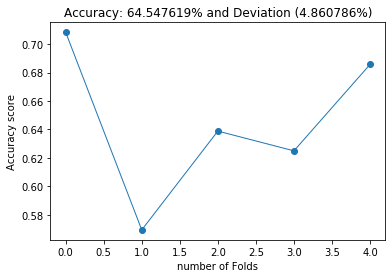

In [65]:
rfcc.fit(xtrain,y_train)
predoi = rfcc.predict(xtest)
print("Testing Accuracy only watch:{}%".format(rfcc.score(xtest,y_test)*100))
kfold(rfcc,5)

### trying with decision tree

In [66]:
dt=DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 
bc.fit(xtrain, y_train)
print("Testing Accuracy only watch:{}%".format(bc.score(xtest,y_test)*100))

Testing Accuracy only watch:61.904761904761905%


### save model 

In [67]:
pickle.dump(rfc, open('models//model_watch.pkl','wb'))

# ML using only Phone data

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [69]:
xtrain = pd.read_csv("Clean_Data//clean_train_phone.csv")
xtest = pd.read_csv("Clean_Data//clean_test_phone.csv")

In [70]:
xtrain.drop(["ID"],axis = 1, inplace = True)
xtest.drop(["ID"],axis = 1, inplace = True)

In [71]:
ytrain = xtrain["output"]
xtrain.drop(["output"],axis = 1, inplace = True)

In [72]:
ytest = xtest["output"]
xtest.drop(["output"],axis = 1, inplace = True)

In [73]:
le = LabelEncoder()
y_train = le.fit_transform(ytrain)
y_test = le.fit_transform(ytest)

In [74]:
xtrain.head()

,accel_phone_x_mean,accel_phone_y_mean,accel_phone_z_mean,gyro_phone_x_mean,gyro_phone_y_mean,gyro_phone_z_mean,accel_phone_x_std,accel_phone_y_std,accel_phone_z_std,gyro_phone_x_std,...,accel_phone_z_max,gyro_phone_x_max,gyro_phone_y_max,gyro_phone_z_max,accel_phone_x_min,accel_phone_y_min,accel_phone_z_min,gyro_phone_x_min,gyro_phone_y_min,gyro_phone_z_min
0,-1.858289,9.551098,0.416234,0.001224,0.038106,-0.005556,2.027485,3.652112,2.091820,0.711767,...,8.677124,1.745514,2.476791,1.337357,-10.639038,0.962326,-9.686493,-2.324676,-2.108017,-1.411194
1,-1.071021,8.408919,-1.283815,-0.017137,0.027013,-0.023789,3.542254,7.627480,3.949949,0.980858,...,18.304611,2.253464,3.527435,2.107529,-19.566513,-9.483810,-17.290695,-3.696442,-2.726151,-5.207306
2,-1.816461,9.548859,-1.047010,-0.005726,0.035791,-0.010624,1.549581,3.103080,1.834809,0.452058,...,7.171860,1.138992,4.067841,1.143982,-11.571808,2.489105,-9.491287,-1.909103,-3.875275,-1.415253
3,4.340126,4.307061,6.840650,-0.001236,-0.000718,0.000076,0.170122,0.227639,0.089180,0.027035,...,7.474320,0.334198,0.459183,0.412323,2.627441,3.285233,5.893967,-0.395569,-0.406128,-0.450180
4,-2.146507,9.510909,0.818673,-0.000247,0.000561,0.000421,0.175640,0.042927,0.179146,0.014611,...,1.498459,0.111969,0.190704,0.124786,-2.551071,9.177765,0.377426,-0.107132,-0.280487,-0.188522


In [75]:
rfc = RandomForestClassifier(n_estimators=100)

In [76]:
rfc.fit(xtrain,y_train)
pred = rfc.predict(xtest)
print("Testing Accuracy only phone:{}%".format(rfc.score(xtest,y_test)*100))

Testing Accuracy only phone:25.793650793650798%


In [77]:
# save model
pickle.dump(rfc, open('models//model_mobile.pkl','wb'))

### accuracy for only mobile dataset is very low which actually makes sense because most of the task require hand movement and phone co-ordinate changes very less

# ML using both Phone and mobile data

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [79]:
xtrain = pd.read_csv("Clean_Data//clean_train_both.csv")
xtest = pd.read_csv("Clean_Data//clean_test_both.csv")

In [80]:
xtrain.drop(["ID"],axis = 1, inplace = True)
xtest.drop(["ID"],axis = 1, inplace = True)

In [81]:
ytrain = xtrain["output"]
xtrain.drop(["output"],axis = 1, inplace = True)

In [82]:
ytest = xtest["output"]
xtest.drop(["output"],axis = 1, inplace = True)

In [83]:
le = LabelEncoder()
y_train = le.fit_transform(ytrain)
y_test = le.fit_transform(ytest)

In [84]:
xtrain.head()

,accel_phone_x_mean,accel_phone_y_mean,accel_phone_z_mean,gyro_phone_x_mean,gyro_phone_y_mean,gyro_phone_z_mean,accel_watch_x_mean,accel_watch_y_mean,accel_watch_z_mean,gyro_watch_x_mean,...,accel_phone_z_min,gyro_phone_x_min,gyro_phone_y_min,gyro_phone_z_min,accel_watch_x_min,accel_watch_y_min,accel_watch_z_min,gyro_watch_x_min,gyro_watch_y_min,gyro_watch_z_min
0,-1.858289,9.551098,0.416234,0.001224,0.038106,-0.005556,11.601998,-1.229969,-0.121505,0.028046,...,-9.686493,-2.324676,-2.108017,-1.411194,1.994370,-18.543392,-9.071481,-11.226302,-6.139659,-7.886152
1,-1.071021,8.408919,-1.283815,-0.017137,0.027013,-0.023789,1.234961,-8.125257,0.480167,-0.327202,...,-17.290695,-3.696442,-2.726151,-5.207306,-15.897499,-19.235315,-19.820848,-10.325736,-7.574458,-9.231690
2,-1.816461,9.548859,-1.047010,-0.005726,0.035791,-0.010624,9.828837,-2.988477,0.023686,0.024794,...,-9.491287,-1.909103,-3.875275,-1.415253,0.542436,-16.722301,-8.908974,-16.678230,-3.820578,-6.779429
3,4.340126,4.307061,6.840650,-0.001236,-0.000718,0.000076,3.070925,-2.427000,8.904933,-0.002947,...,5.893967,-0.395569,-0.406128,-0.450180,-0.734122,-4.805761,7.371298,-1.907133,-1.544470,-2.664792
4,-2.146507,9.510909,0.818673,-0.000247,0.000561,0.000421,9.573835,-0.859850,0.626032,-0.002764,...,0.377426,-0.107132,-0.280487,-0.188522,8.530391,-2.316689,-0.183007,-3.045990,-0.711070,-0.494741


In [85]:
rfc = RandomForestClassifier(n_estimators=200)

Testing Accuracy both:41.269841269841265%
Individual Score: [0.25       0.33333333 0.375      0.3943662  0.19117647]
Mean Score: 30.877520022093343 %


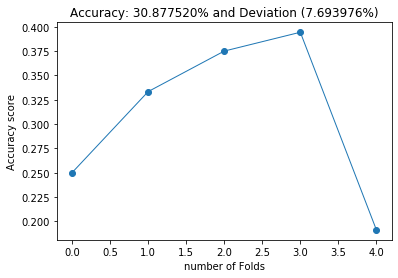

In [89]:
rfc.fit(xtrain,y_train)
pred = rfc.predict(xtest)
print("Testing Accuracy both:{}%".format(rfc.score(xtest,y_test)*100))
kfold(rfc,5)

In [87]:
# save model
pickle.dump(rfc, open('models//model_both.pkl','wb'))

### accuracy of both the phone and watch dataset is coming in between of the 2 above calculated accuracy

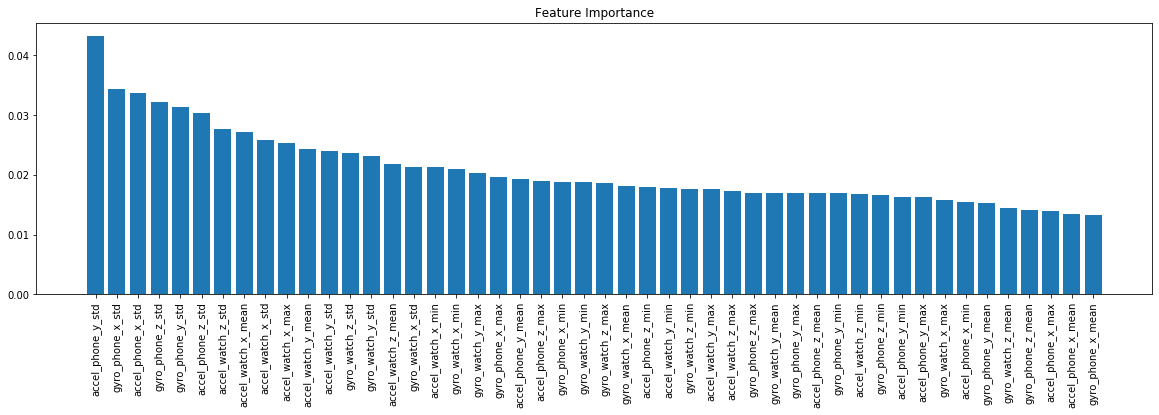

In [88]:
rfc1=RandomForestClassifier(n_estimators=300)
model=rfc1.fit(xtrain,y_train)
# calculated by out of bag data while baaging in randomforest.
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [xtrain.columns[i] for i in indices]

plt.figure(figsize=(20,5))
plt.title("Feature Importance")
plt.bar(range(xtest.shape[1]), importances[indices])
plt.xticks(range(xtest.shape[1]), names, rotation=90)
plt.show()

#### `feature importance plot`